In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
from tabulate import tabulate 
# import latextable
from texttable import Texttable
import pickle

# 1. Dataset and Mapping creation

In [2]:
def create_dataset(df):
    '''Create a dataset of numerical encoding for each column
        *** input ***
        * df - the pandas dataframe that needs to be changed to numerical data
        *** returns ***
        * df - the new pandas dataframe with the numerical encodings
        * class_dict - a dictionary containing the mappings for each column header and the label for each numerical value in the new dataframe
    '''
    
    class_dict = {}
    for column in df:
        values, df = create_mapping(df,column)
        class_dict[column] = values

    return df, class_dict

def create_mapping(df,column):
    '''create the mapping from label to number
    *** input ***
    *df - the dataframe (pandas) to start from
    *column - the column name
    *** returns ***
    * values - the dict with as the key the label and as value  the numercal value
    * df - the new dataframe (pandas) with for one column numerical values
    '''
    
    values = {}
    count = 1
    for i in range(len(df[column])):
 
        if isinstance(df.loc[i,column], str):
            if df.loc[i,column] in values.keys():
            
                df.loc[i,column] = values[df.loc[i,column]]
            else:
                values[df.loc[i,column]] = count
                df.loc[i, column] = count
                count+=1
        else:
            if str(df.loc[i,column]) in values.keys():
            
                df.loc[i,column] = values[str(df.loc[i,column])]
            else:
                values[str(df.loc[i,column])] = count
                df.loc[i, column] = count
                count+=1

    return values, df
                
            
def feat2vec(file):
    '''create a boxplot of the data
    *** input ***
    *** returns ***
    '''
    df1 = pd.read_pickle(file)
    data, class_dict = create_dataset(df1)
    data.to_pickle("vectorized1.pkl")  
    with open('data/class_dict.pkl', 'wb') as fp:
        pickle.dump(class_dict, fp)
    return data,class_dict,df1


In [3]:
import os
file_normal = 'data/dataframe_new.pkl'
file_anomalies = 'data/dataframe_anom.pkl'
file_v_anomalies = 'data/vectorized_anom.pkl'
file_v_normal = 'data/vectorized_norm.pkl'
file_class_dict = 'data/class_dict_norm.pkl'

if os.path.isfile(file_v_normal) and os.path.isfile(file_v_normal) and os.path.isfile(file_class_dict):
    df = pd.read_pickle(file_normal)
    data = pd.read_pickle(file_v_normal)
    with open(file_class_dict, 'rb') as f:
        class_dict = pickle.load(f)

else:
    data, class_dict,df = feat2vec(file_normal)
    
# if os.path.isfile(file_anomalies) and os.path.isfile(file_v_anomalies):
#     df1 = pd.read_pickle(file_anomalies)
#     data1 = pd.read_pickle(file_v_anomalies)
# #     class_dict = 
# else:
#     data2, class_dict2,df2 = feat2vec(file_anomalies)
print(data)


      type    url protocol  Host  User-Agent  Accept-Encoding  Accept  \
0        1      1        1     1           1                1       1   
1        1      1        1     1           1                1       1   
2        1      1        1     1           1                1       1   
3        1      1        1     1           1                1       1   
4        1      1        1     1           1                1       1   
...    ...    ...      ...   ...         ...              ...     ...   
60456    1   2459        1     2           1                1       1   
60457    1   2460        1     2           1                1       1   
60458    2   2461        1     2           1                1       1   
60459    2  17669        1     2           1                1       1   
60460    2     44        1     2           1                1       1   

       Connection  content-type  Cookie  ...  id  set-cookie  timestamp  \
0               1             1       1  ...   1

# 2. Creating a table of features and data preparation

,Features,Max,Min,Avg,Classes,Total
0,type,48739,1968,20153.666667,3,60461
1,url,7555,1,3.421869,17669,60461
2,protocol,60461,60461,60461.000000,1,60461
3,Host,53049,7412,30230.500000,2,60461
4,User-Agent,60461,60461,60461.000000,1,60461
5,Accept-Encoding,60461,60461,60461.000000,1,60461
6,Accept,60461,60461,60461.000000,1,60461
7,Connection,60457,4,30230.500000,2,60461
8,content-type,24741,4,10076.833333,6,60461
9,Cookie,24755,2,2628.739130,23,60461


end


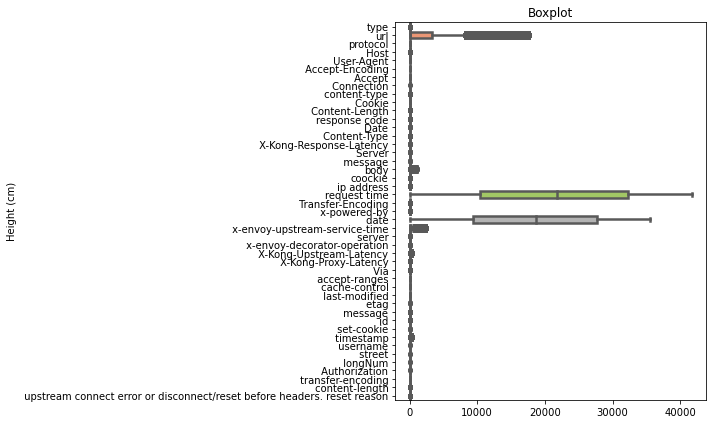

In [4]:
# check how many features 
# how many different features for each
# distribution of these features
# make assumption of what is usefull
# 60001 requests at this time and 35 columns at this time
# what to do with NANS


def sanitized_data(headers):
    '''further sanitizes the headers'''
    headers = [x.replace("\n","") for x in headers]
    headers = [x.replace('"',"") for x in headers]
    headers = [x.replace("{","") for x in headers]
    return headers
    
def barplot(data):
    '''creates a barplot of the data'''
    x = [name[:5] for name in data.columns]
    y = [np.bincount(data.to_numpy().astype(int)[:,i])[1:].shape[0] for i in range(data.to_numpy().shape[1])]
    y2 =[data.to_numpy().astype(int)[:,i] for i in range(data.to_numpy().shape[1])]
    fig = plt.figure()
    colors = sns.color_palette('pastel')

    ax = fig.add_axes([0,1,2,3])
    ax.bar(x,y,color=colors[:35])
    plt.show()

def boxplot(data):
    '''creates a boxplot of the data'''
    plt.figure(figsize=(10,6), tight_layout=True)
    ax = sns.boxplot(data=data,orient='h', palette='Set2', linewidth=2.5)
    ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
    
def skewing_data(data):
    '''Displays a pandas dataframe that shows the number of different classes in each feature, 
    the average amount that the same feature is seen, the minimum amount that one of the classes of the feature is seen,
    and the maximum amount that the class of a feature is seen
    This gives us insight in which classes are used a lot within each feature'''
    
    # the amount of times a feature class is present in the data
    num_featclass = [np.bincount(data.to_numpy().astype(int)[:,i])[1:] for i in range(data.to_numpy().shape[1])]
    
    feature_names = sanitized_data([data.columns][0])
    max_num = [max(x) for x in num_featclass]
    min_num = [min(x) for x in num_featclass]
    avg_num = [np.mean(x) for x in num_featclass]
    classes = [len(x) for x in num_featclass]
    total = [sum(x) for x in num_featclass]
    
    names = ['Features','Max', 'Min','Avg','Classes','Total']
    columns = [[feature_names[i], max_num[i], min_num[i], avg_num[i], classes[i],total[i]] for i in range(len(feature_names))] 
    df = pd.DataFrame(columns, columns=names)
    display(df)
    return(df)

def create_latex_table(tab):
    '''Creates the output for a latex table'''
    print('Tabulate Table:')
    print(tabulate(tab, headers='firstrow'))
    table = Texttable()
    table.set_cols_align(["c"] * 4)
    table.set_deco(Texttable.HEADER | Texttable.VLINES)
    print('\nTexttable Table:')
    print(table.draw())
    
    print('\nTabulate Latex:')
    print(tabulate(rows, headers='firstrow', tablefmt='latex'))
    print('\nTexttable Latex:')
    print(latextable.draw_latex(table, caption='A comparison of rocket features.'))
    


information_df = skewing_data(data)

boxplot(data)
print('end')

## 2.1 Data Preparation

In [5]:
def data_prep(data):
    # the features that have only one class means that those features are the same for each call. This is due to the test environment.
    # for our research do they matter?
    # but might matter if the anomalous data does have multiple classes? Also the might skew the dataset, since the algorithm will just learn that 
    # if something else is present it is the anomalous data
    
    return n_data

   ## 2.2 Cosine similarity

In [6]:
from numpy.linalg import norm

def create_cosine_similarity(V, feat1,feat2):
    A = V[feat1]
    B = V[feat2]
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    print("cosing similarity between: " + feat1 + " and " +feat2 + ':', cosine)

create_cosine_similarity(data, 'url' ,'response code' )



cosing similarity between: url and response code: 0.37950888916178743


there are three different coockie contents right now

## 2.2 Boxplots 


In [7]:
def cos_sim_f(df):
    feats = df.columns

    cos_sim_a = {}
    for feat in range(len(feats)):
        for feat2 in range(len(feats)):
            if feat != feat2:
                cos_sim = (data[feats[feat]] @ data[feats[feat2]].T) / (np.linalg.norm(data[feats[feat]])* np.linalg.norm(data[feats[feat2]]))
                cos_sim_a[feats[feat],feats[feat2]] = cos_sim 
    return cos_sim_a
    
cossim = cos_sim_f(df)



In [8]:
for key, value in cossim.items():
    if value >= 0.9:
        name, age = key
        course = value
        print("{:<10} {:<10} {:<10}".format(name, age, course))

type       protocol   0.9756056036583625
type        Host      0.9604927341973841
type        User-Agent 0.9756056036583625
type        Accept-Encoding 0.9756056036583625
type        Accept    0.9756056036583625
type        Connection 0.975577780932626
type        content-type 0.9137343503598305
type        Date      0.9755964518569477
type        Content-Type 0.9723901563479491
type        X-Kong-Response-Latency 0.9756376601726579
type        Server    0.9756438846147697
type          message 0.9756299609556333
type       coockie    0.9452725491768806
type       ip address 0.9372857597343841
type        Transfer-Encoding 0.9486970151747101
type        x-powered-by 0.9760475672304098
type        server    0.9756438846147697
type        x-envoy-decorator-operation 0.9756438846147697
type        Via       0.9375816382381525
type        accept-ranges 0.9375035009691488
type        cache-control 0.9375035009691488
type        last-modified 0.9375035009691488
type        message   0.934783

# 4. Sankey diagram of Attack flows

In [9]:
import plotly.graph_objects as go
from collections import OrderedDict
import seaborn as sns
import random
import numpy as np
from collections import defaultdict

In [16]:
# df1 = pd.read_pickle(file)
num_dict = class_dict['url']
num_dict = {v: k for k, v in num_dict.items()}

## 4.1 Dataframe for ApiFlows

In [17]:
class APIflows:
    '''This object creates a representation for the apicalls that the user makes to the application
        self.source - the source lists for the beginning of each flow which starts at the client
        self.target - the target list for where the flow leads to
        self.coockies - set of already observed coockies
        self.flowdict - '''
    def __init__(self, data):
        self.coockies = set()
        self.data = data
        self.flowdict = OrderedDict()
        self.paths = []
        self.flows()
        self.path_info()
    
    def flows(self):
        '''checks if the coockie is new or seen already and adds things to the right lists/sets'''
        self.coockies.add(self.data['coockie'][0])
        self.flowdict[(0,self.data['url'][0])] = 1
        path = [(0,1)]
        for i in range(1,len(self.data['coockie'])-1):
            
            # check if coockie is already seen
            if self.data['coockie'][i] in self.coockies:
                
                # if the same coockie thus the same user
                # if the flow is not seen yet
                if self.data['coockie'][i] == self.data['coockie'][i-1]:
                    path.append((self.data['url'][i-1],self.data['url'][i]))
                    self.add_flow_to_dict(self.data['url'][i-1],self.data['url'][i])

                else:
                    self.paths.append(path)
                    path = [(0,self.data['url'][i])]
                    self.add_flow_to_dict(0,self.data['url'][i])
                    
            else:
                self.paths.append(path)
                path = [(0,self.data['url'][i])]
                self.add_flow_to_dict(0,self.data['url'][i])
                self.coockies.add(self.data['coockie'][i])
    
    
    def add_flow_to_dict(self,flow1,flow2):
        '''Checks whether the flow is from the same user (by comparing coockies) and adds 
            them to the flow dict and source and target lists
            
            ***input***
            flow1 & flow2: the flows of the first and second user            
            '''

        if ((flow1,flow2)) not in self.flowdict:
            self.flowdict[((flow1,flow2))] = 1

        else:
            self.flowdict[((flow1,flow2))] += 1
            
    def path_info(self):    
        '''Get the shortest and longest paths
            Also get which paths are taken most often'''
        self.shortest = self.paths
        self.shortest.sort(key=lambda l: (len(l), l))
        self.numbers = {}
        
        for i in range(len(self.paths)):
            if tuple(self.paths[i]) in list(self.numbers.keys()):
                self.numbers[tuple(self.paths[i])] += 1  
            
            else:    
                self.numbers[tuple(self.paths[i])] = 1

In [18]:
flows = APIflows(data)

## 4.2 Code for sankey visualisations 

In [25]:
def create_sankey(flows,n,lab,option='default'):
    '''creates sankey diagram according to option for flow
        *** input***
            flows - the object containing the dicts and lists of flows/paths
            n - the number of flows  you want visualised
            lab - the labels for each flow
            option - the option of what needs to be visualised
            
        *** Options ***
            longest - The longest n paths users have taken
            shortest - The shortest n paths users have taken
            most - The n paths users take most offten
            least - The n paths users take least often
            defualt - Visualising the most seen api calls made from on point to another
        '''
    if option == 'longest':
        longest = flows.shortest
        longest.sort(key=lambda l: (len(l), l),reverse=True)
        plot_sankey(longest[:n], lab, flows.numbers,n)

    elif option == 'shortest':
        shortest = flows.shortest
        shortest.sort(key=lambda l: (len(l), l))
        plot_sankey(shortest[:n], lab, flows.numbers,n)
        
    elif option == 'most':
        flow_dict = dict(sorted(flows.numbers.items(), key=lambda x:x[1],reverse=True))
        plot_sankey(list(flow_dict.keys())[:n],lab, flows.numbers,n)
        
    elif option == 'least':
        flow_dict = dict(sorted(flows.numbers.items(), key=lambda x:x[1]))
        plot_sankey(list(flow_dict.keys())[:n], lab, flows.numbers,n)
        
    else:
        flow_dict = dict(sorted(flows.flowdict.items(), key=lambda x:x[1],reverse=True))
        plot_sankey(list(flow_dict.keys())[:n],lab, flow_dict,n)
        
        
def plot_sankey(s,lab,flow_dict,n):
    '''Plot the sankey diagram
    *** Input ***
        s - the source for each vertex
        lab - the label for each node
        flow_dict - the dictionary with paths containing edges and values
        n - the number of paths
    '''
    
    color_pal = sns.color_palette("Spectral",n).as_hex()
    
    # sort so that the sankey diagram is visualised in the right order
    s.sort()
    # if a list is used, some changes are made to visualise the paths
    if type(s[0]) is list:
        v = [[flow_dict[tuple(x)]] * len(x) for x in s]
        v1 = []
        s1 = []
        for i in range(len(s)):
            s1 = s1 + s[i]
            v1 = v1 + v[i]
        s =s1
        v =v1
        print(s)

    # this is used when there is not path just edges
    else:
        v = [flow_dict[x] for x in s]

    # creating label names instead of numbers
    l = ['client'] + [lab[x][:12] for x in range(1,15562)]
    
    # the dictionary is filled with tuples, so again some changes need to be added to representation
    if type(s[0][0]) is tuple:
        s1 = []
        for i in range(len(s)):
            s1 = s1 + list(s[i])
        s =s1
    
    # creating the figure
    fig = go.Figure(go.Sankey(
        arrangement='snap',
        node=dict(
              label = l,
            line = dict(color = "black", width = 0.5),
            pad=15,
            thickness=20,
        ),
        link=dict(
            source = list(np.array(s)[:,0]) ,
            target = list(np.array(s)[:,1]),
            value= v,
        )
    ))

    fig.show()

## 4.3 Sankey Visualisations

In [26]:
create_sankey(flows,50, num_dict,'default')

In [27]:
create_sankey(flows,20, num_dict,'longest')

[(0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (2, 3), (0, 1), (1, 1), (1, 15), (15, 436), (436, 434), (434, 430), (430, 431), (431, 435), (435, 628), (628, 171), (171, 432), (432, 170), (170, 433), (433, 1), (0, 1), (1, 15), (15, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 15), (0, 1), (1, 15), (15, 15), (15, 15), (15, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 15), (15, 1), (1, 15), (15, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 15), (15, 1), (1, 15), (15, 1), (1, 15), (15, 15), (15, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 32), (32, 1), (0, 15), (15, 1), (1, 15), (15, 1), (1, 15), (15, 15), (15, 15), (15, 15), (15, 15), (15, 15), (15, 15

In [28]:
create_sankey(flows,1000, num_dict,'shortest')

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1),

In [29]:
create_sankey(flows,50, num_dict,'most')

In [24]:
create_sankey(flows,50, num_dict,'least')

# Data preparation
Taking out every variable that can only have one value. Also taking out the variables that have a cosine similarity of 0.98 or higher

In [ ]:
import copy
from tabulate import tabulate
def data_prep(data, flag='default'):
    data_p = copy.deepcopy(data)
    removed = set()
    removed_cause = [['variable', 'removed variable ', 'cosine similarity/count']]
    for i,count in enumerate(information_df['Classes']):
        if count < 2:
            data_p.pop(data.columns[i]) 
            removed_cause.append([data.columns[i],'',count])
            removed.add(data.columns[i])
    
    if flag == 'extended':
        for key,value in cossim.items():
            if key[1] not in removed and key[0] not in removed:
                if value >= 0.98:
                    data_p.pop(key[1])
                    removed_cause.append([key[0],key[1],value])
                    removed.add(key[1])
#     print(tabulate(removed_cause, headers ='firstrow',tablefmt='grid' ))
    df_removed = pd.DataFrame(removed_cause[1:],columns=removed_cause[0])
    display(df_removed)
    display(data_p)
    return df_removed, data_p
            
df_removed, data_p = data_prep(data)


things to keep in mind: now some of the removed things from the dataset might bw usefull. Only one way removed and not the other way around are some things all cosine similated to each other only against one thing. Need to check this. x-powered by seems to be correlated with a lot. Similarly content type as well. Maybe look at how many things are highly correlated with one another and with what. What would be a good representation for this?

# 5 Multivariate Gaussian Distribution

In [ ]:
def mvn(mu,sigma,x):
    d = x.shape[1]
    print(np.linalg.det(sigma))
    N = 1/(np.sqrt(2*np.pi)**d * np.linalg.det(sigma)) * np.exp(-1/2*(x-mu).T @ np.linalg.inv(sigma) @ (x-mu))
    return N

def covarmu(x):
    mu2 = np.mean(x,axis=1,dtype='float64')
    mu = np.array([np.mean(x[i,:]) for i in range(x.shape[0])])
    mu = mu.reshape([mu.shape[0],1])
    sigma = np.cov(x.astype(float))
#     sigma_ij = [(1/(n-1)) * np.sum([(x[:,j][t] - np.mean(x,axis=0)) @ (x[:,j][t] - np.mean(x,axis=1)) for t in range(x.shape[0])]) for j in range(x.shape[1])]

    return mu2, sigma


mu, sigma =covarmu(data_p.to_numpy().T)

In [ ]:
import scipy

N = scipy.stats.multivariate_normal(list(mu),list(sigma),allow_singular=True)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal


# Sample parameters
m = mu[12:14]
s = sigma[12:14,12:14]
rv = multivariate_normal(m, s,allow_singular=True)
sample = rv.rvs(500)


# Bounds parameters
x_abs = 2.5
y_abs = 2.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# The heatmap
ax.contourf(x_grid, y_grid, 0.1 * rv.pdf(pos),
             zdir='z', levels=0.1 * levels, alpha=0.9)

# The wireframe
ax.plot_wireframe(x_grid, y_grid, rv.pdf(
    pos), rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
#ax.scatter(sample[:, 0], sample[:, 1], 1.05 * rv.pdf(sample), c='k')
ax.plot_surface(x_grid, y_grid, rv.pdf(pos),cmap='viridis',linewidth=0)
# ax.legend()
ax.set_title("Gaussian sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)

plt.show()

In [ ]:
def boxplot(data):
    '''creates a boxplot of the data'''
    
    plt.figure(figsize=(10,6), tight_layout=True)
    ax = sns.boxplot(data=data_p[:7:],orient='h', palette='Set3', linewidth=2.5)
    ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
    
boxplot(data_p)

count=0
# for column in data_p.columns:
my_data = pd.Series(data_p[data_p.columns[3]])


Questions to ask myself, some of the data here looks like it is normally distributed but not all of my data is. Do I want my data to follow a normal distribution? Do I not? Can I stripe away data that has a similar cosine similariy or do not want that. All questions I need to investigate. Especially since I have now created actual interesting information probably. How will this go. What will I use and why?

How will I choose what features/variables to use and what to not use. I know that for each observation of features together there needs to be a form of conditional probability. So maybe I should also look at the conditional probabililty bewtween featuers? Something N-gram like. How do these features interact with each other? They event within a variable should be independent of the other events within the variable but dependent of other variables within the same observation.

In [ ]:
data_p['url'].value_counts()
data_p['url'].unique()
data_p['type'].unique()

# 6 Feature Encodings for my nominal categorical features

## 6.1 One hot encoding

In [ ]:
df1 = pd.read_pickle(file_normal)

df1['body'] = [str(df1['body'][x]) for x in range(len(df1['body']))]
df1['coockie'] = [str(df1['coockie'][x]) for x in range(len(df1['coockie']))]


one hot vector encoding makes the dataset increasingly large and does not keep the uthe mutual exclusivity between the features

In [ ]:
def data_tabling(data):
    '''Displays a pandas dataframe that shows the number of different classes in each feature, 
    the average amount that the same feature is seen, the minimum amount that one of the classes of the feature is seen,
    and the maximum amount that the class of a feature is seen
    This gives us insight in which classes are used a lot within each feature'''
    
    # the amount of times a feature class is present in the data
    feature_classes = [len(data[column].unique()) for column in data.columns]
    feature_numbers = [data[column].value_counts() for column in data.columns]
    feature_names = sanitized_data([data.columns][0])
    
    max_num = [max(x) for x in feature_numbers]
    min_num = [min(x) for x in feature_numbers]
    avg_num = [np.mean(x) for x in feature_numbers]
    classes = [x for x in feature_classes]
    total = [sum(x) for x in feature_numbers]
    
    names = ['Features','Max', 'Min','Avg','Classes','Total']
    columns = [[feature_names[i], max_num[i], min_num[i], avg_num[i], classes[i],total[i]] for i in range(len(feature_names))] 
    df = pd.DataFrame(columns, columns=names)
    display(df)
    return(df)

In [ ]:
data_tabling(df1)

In [ ]:
def data_prep(data):
    data_p = copy.deepcopy(data)
    removed = set()
    removed_cause = [['variable', 'removed variable ', 'cosine similarity/count']]
    for column in data.columns:
        if len(data[column].unique()) < 2:
            data_p.pop(column) 
            removed_cause.append([column,'',len(data[column].unique())])
            removed.add(column)
    

    display(data_p)
    return df_removed, data_p

In [ ]:
removed, df1 = data_prep(df1)

In [ ]:
one_hot = pd.get_dummies(df1)

In [ ]:
print(one_hot)

In [ ]:
# def divide_into_request_response(data_n,data_a):
 
#     rq_n = data_n.dropna(subset=['request']).reset_index(drop=True)
#     rs_n = data_n.dropna(subset=['response']).reset_index(drop=True)
#     rq_a = data_a.dropna(subset=['request']).reset_index(drop=True)
#     rs_a = data_a.dropna(subset=['response']).reset_index(drop=True)
        
#     return rq_n,rs_n,rq_a,rs_a
    
# def combine_request_response(rq_n,rs_n,rq_a,rs_a):
    
#     for user,i in enumerate(rq_n):
#         if 